In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
print(os.getcwd()) 
##It wouldn't read the csv dataset from the designated folder.

c:\Users\falle\PS_XBOX_KeyStone_Project\notebooks


In [4]:
df = pd.read_csv("../data/cleaned_vgsales_data1.csv")

## Data of Playstation and XBOX Sales

In [5]:
df.head()
#Showing the data of Playstation and XBOX consoles throughout the video game industry.
#I will show different charts of their sales, how many genre their are per system.
#I will also do the overall of which of the two consoles is superior.


,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,16,X360,2010.0,Misc,14.97,4.94,0.24,1.67,21.82
1,32,X360,2010.0,Shooter,9.67,3.73,0.11,1.13,14.64
2,24,X360,2013.0,Action,9.63,5.31,0.06,1.38,16.38
3,18,PS2,2004.0,Action,9.43,0.40,0.41,10.57,20.81
4,30,X360,2011.0,Shooter,9.03,4.28,0.13,1.32,14.76


In [6]:
df['Genre'].value_counts()

Genre
Action          1554
Sports          1304
Shooter          814
Racing           717
Misc             624
Role-Playing     562
Fighting         471
Adventure        443
Platform         292
Simulation       253
Strategy         222
Puzzle            68
Name: count, dtype: int64

In [7]:
category = "Platform"
values = "Global_Sales"

platform_totals = df.groupby(category)[values].sum()
platform_totals

#Overall, global sales of all the Playstation and XBOX games in the video game market.

Platform
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

## Which Consoles Has The Most In Sales Overall?

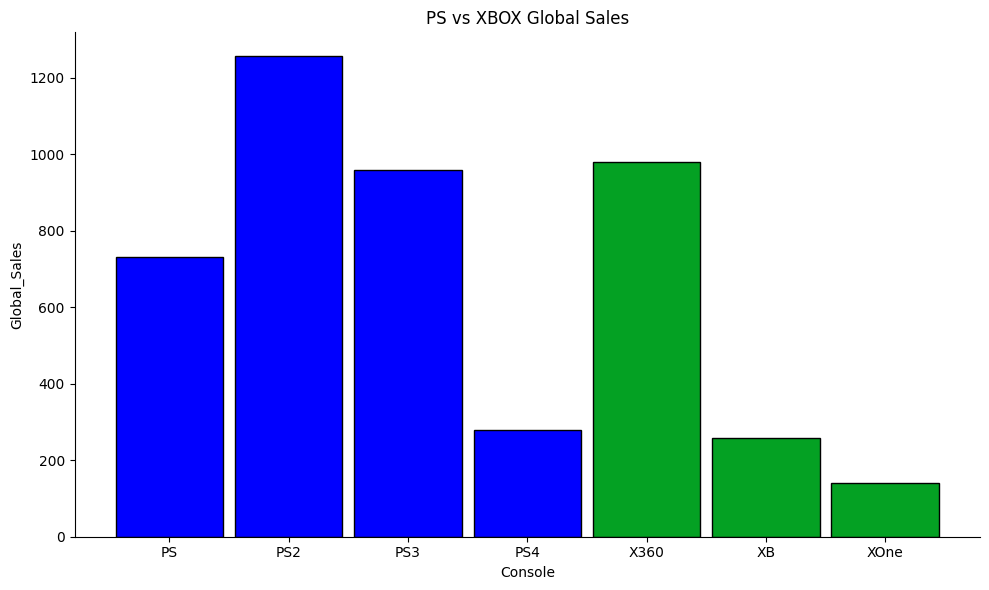

In [8]:
plt.figure(figsize=(10,6)) 

special_artists = ["X360", "XB", "XOne"] 
colors = ["#04a123" if artist in special_artists else "blue"
          for artist in platform_totals.index]


plt.bar(platform_totals.index, platform_totals.values, color = colors, width=0.9,edgecolor="black") 
ax = plt.gca() 
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

plt.xlabel("Console")
plt.ylabel("Global_Sales")
plt.title("PS vs XBOX Global Sales")

plt.tight_layout()
plt.show()


In [9]:
#This bar chart show the global sales on all consoles platforms between the Playstation and XBOX throughout
# the yearly sales for each version of the video game systems. 

## What Was The Sales Like For Playstation?

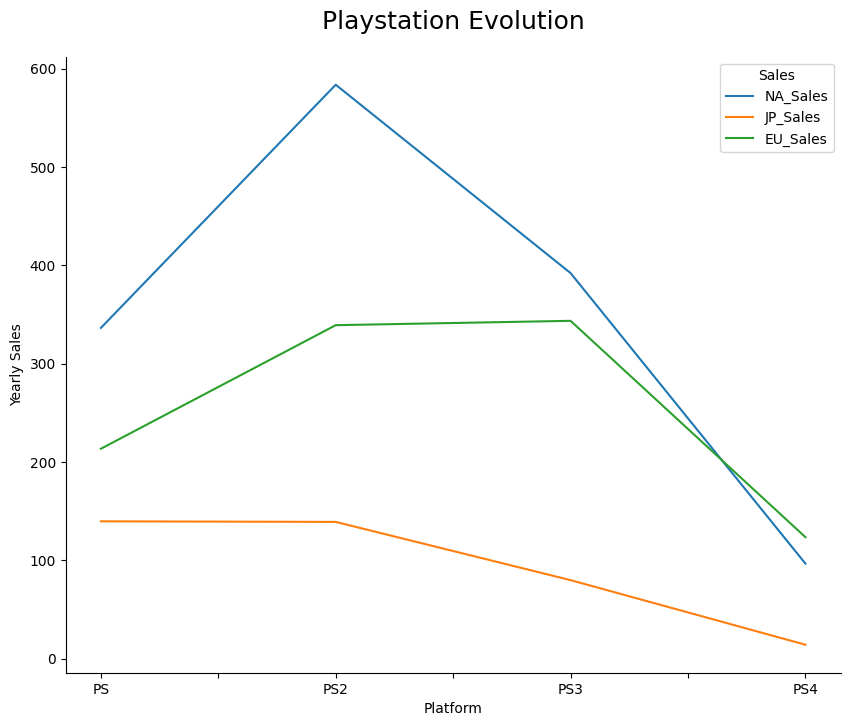

In [10]:
plt.figure(figsize=(10,8))
plt.plot()
plt.xlabel("Platform")
plt.ylabel("Yearly Sales")
plt.title("Playstation Evolution", fontsize = 18, pad=20)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


keep_platforms = ["PS", "PS2", "PS3", "PS4"]

df_filtered = df[df["Platform"].isin(keep_platforms)]

df_filtered.groupby("Platform")["NA_Sales"].sum().plot()

df_filtered.groupby("Platform")["JP_Sales"].sum().plot()

df_filtered.groupby("Platform")["EU_Sales"].sum().plot()

plt.legend(labels=["NA_Sales","JP_Sales","EU_Sales"], title="Sales", loc="upper right")

plt.tight_layout
plt.show()

#This line chart show the evolution of the playstation sales from different region of sales. 

## What Was The Sales Like For XBOX?

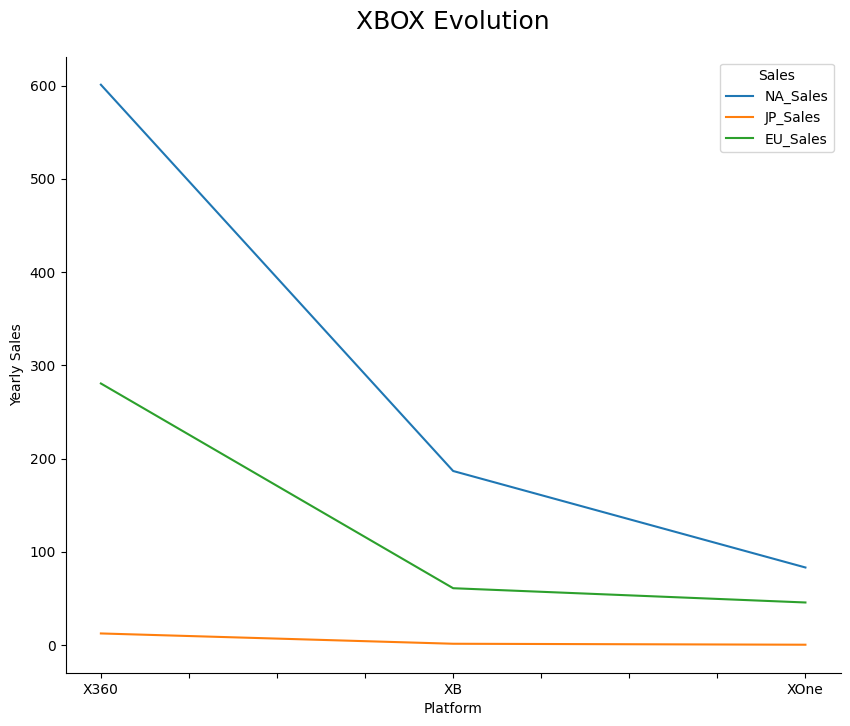

In [11]:
plt.figure(figsize=(10,8))
plt.plot()

plt.xlabel("Platform")
plt.ylabel("Yearly Sales")
plt.title("XBOX Evolution", fontsize = 18, pad=20)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


keep_platforms = ["X360", "XB", "XOne"]

df_filtered = df[df["Platform"].isin(keep_platforms)]

df_filtered.groupby("Platform")["NA_Sales"].sum().plot()

df_filtered.groupby("Platform")["JP_Sales"].sum().plot()

df_filtered.groupby("Platform")["EU_Sales"].sum().plot()

plt.legend(labels=["NA_Sales","JP_Sales","EU_Sales"], title="Sales", loc="upper right") # Wanted to label the sales to avoid confusion

plt.tight_layout
plt.show()

#This line chart show the evolution of the xbox sales from different region of sales. 

In [12]:
##Playstation has always been the prime console that most players normally get. 
# The XBOX didn't came until a bit later with their original console. 
# Despite the overgrowing sales for the Playstation, it shows the significance difference of how their consoles fair over the years. 
# So, the big question is, wover all the yearls of moedling playstation and Xbox. 
# Which of the two is the superior console throughout the decade since its launch.

In [13]:
playstation = ["PS", "PS2", "PS3", "PS4", "PS5"]
xbox = ["XB", "X360", "XOne", "XS"]

ps_total = df[df["Platform"].isin(playstation)]["Global_Sales"].sum()
xbox_total = df[df["Platform"].isin(xbox)]["Global_Sales"].sum()

print("PlayStation Total:", ps_total)
print("Xbox Total:", xbox_total)



PlayStation Total: 3222.24
Xbox Total: 1379.2800000000002


In [14]:
#I use this method to sum for Global Sales of both XBOX and Playstation console combine. I chose the pie chart for this method
#because, it will give me the percentage of how many consoles of video games have been purchase for the overall of games sold worldwide.

## Which Console Sold The Most Worldwide?

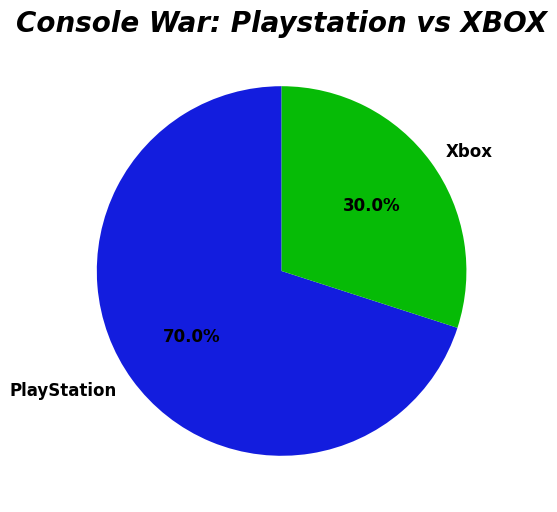

In [15]:
labels = ["PlayStation", "Xbox"]
sizes = [ps_total, xbox_total]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90,colors=["#131DDE", "#06BB06"],
        textprops={"fontsize": 12, "color": "black", "fontweight": "bold"}
)


plt.title("Console War: Playstation vs XBOX", fontsize=20, fontweight="bold", fontstyle="italic")

plt.tight_layout
plt.show()



In [16]:
#The pie chart is the perfect choice for this reading as it shows the overall games that sold for specific consoles worldwide.

## What Was The Yearly Sales For PS and XBOX?

In [17]:
playstation_platforms = ["PS", "PS2", "PS3", "PS4"]
xbox_platforms = ["XB", "X360", "XOne"]

#I wanted to show the progression of the two console changes over time by the global sales.

In [18]:
df_ps = df[df["Platform"].isin(playstation_platforms)]
df_xb = df[df["Platform"].isin(xbox_platforms)]


In [19]:
ps_yearly = df_ps.groupby("Year")["Global_Sales"].sum()
xb_yearly = df_xb.groupby("Year")["Global_Sales"].sum()


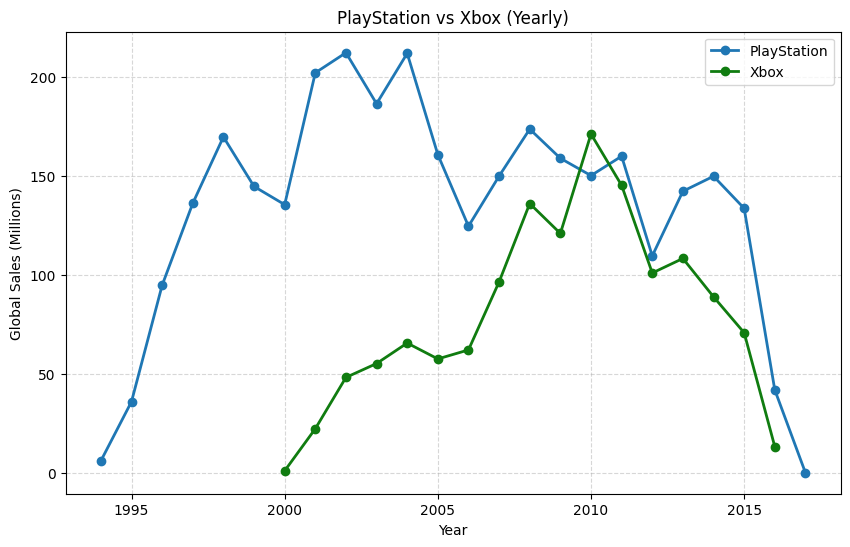

In [20]:
plt.figure(figsize=(10,6))
plt.plot(ps_yearly.index, ps_yearly.values, marker="o", label="PlayStation", linewidth=2)
plt.plot(xb_yearly.index, xb_yearly.values, marker="o", label="Xbox", linewidth=2,color="#107C10" 
)


plt.title("PlayStation vs Xbox (Yearly)")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.tight_layout
plt.show()



In [21]:
#This chart shows the growth of the playstation and the xbox over the years. How playstation started in the 90s.
#And then the XBOX in the 2000s. It shows the rise and fall for every model of Xbox and Playstation.

## What Genre Sold The Most?

In [22]:
df["Genre"].value_counts()

Genre
Action          1554
Sports          1304
Shooter          814
Racing           717
Misc             624
Role-Playing     562
Fighting         471
Adventure        443
Platform         292
Simulation       253
Strategy         222
Puzzle            68
Name: count, dtype: int64

In [23]:
genre_counts = df.groupby("Genre")["Genre"].count()


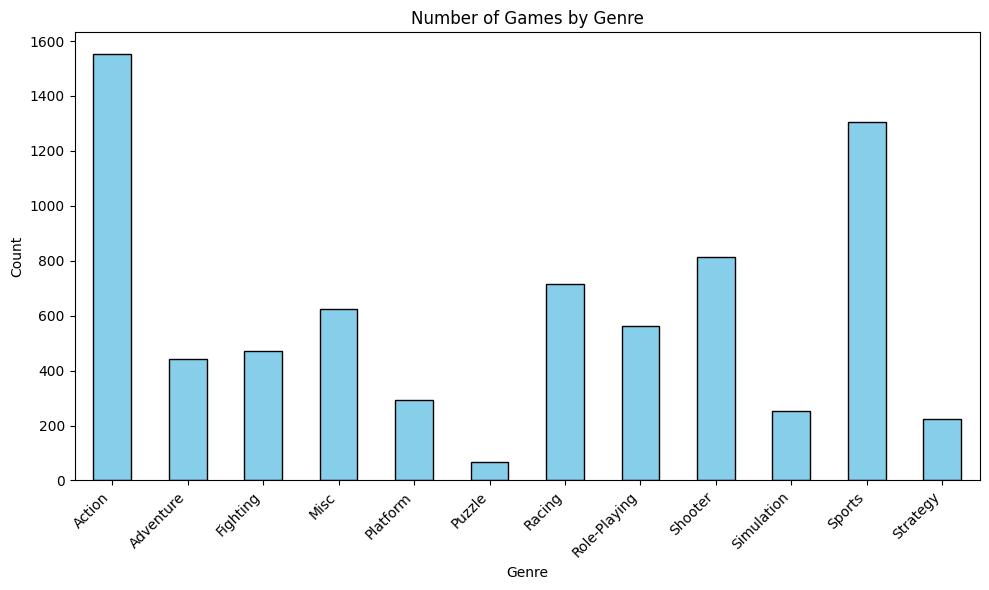

In [24]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Number of Games by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In [25]:
#This bar chart shows the most to the least type of genre of games that consumers buy for PS and XBOX.

## What's The Sales Like For Different Genre?

In [26]:
genre_year_sales = df.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()


In [27]:
pivot_df = genre_year_sales.pivot(index="Year", columns="Genre", values="Global_Sales")


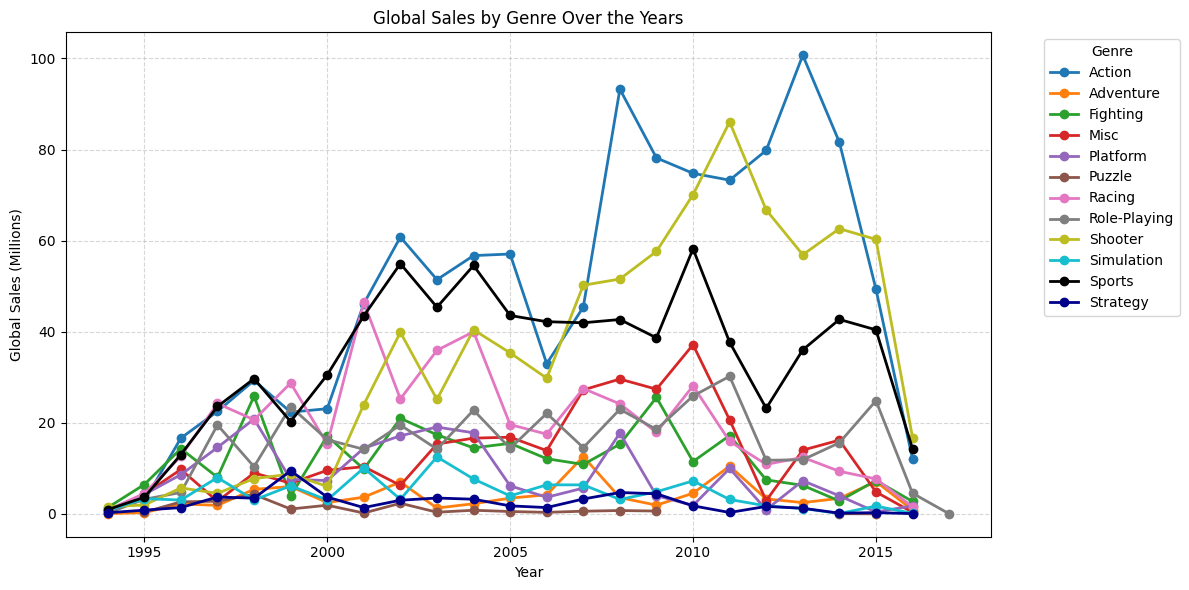

In [28]:
custom_colors = {
    "Sports": "black",
    "Strategy": "darkblue"
}

plt.figure(figsize=(12, 6))
for genre in pivot_df.columns:
    color = custom_colors.get(genre, None)
    plt.plot(pivot_df.index, pivot_df[genre], marker="o", markersize=6, linewidth=2, label=genre, color=color,
        
    )


plt.title("Global Sales by Genre Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.tight_layout()

plt.show()



In [29]:
#The line chart shows sales of games that are sold by genre. I tried other charts but this is the closest to being readable.

## What Was The Genre Sales Like For Playstation?

In [30]:
ps_platforms = ['PS', 'PS2', 'PS3', 'PS4']  
df_ps = df[df['Platform'].isin(ps_platforms)]

# Group by genre and sum global sales
ps_genre_sales = df_ps.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


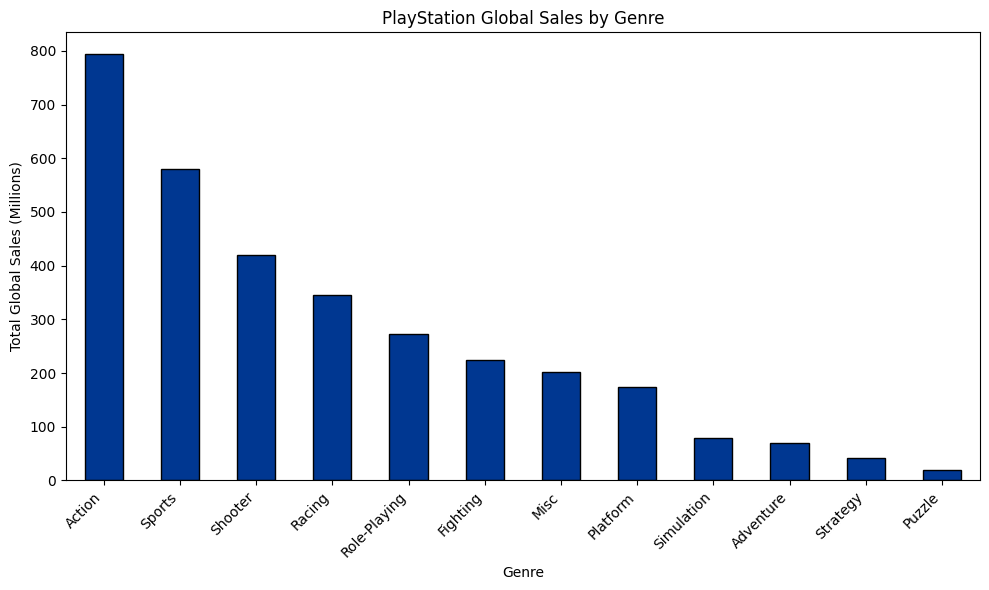

In [31]:
plt.figure(figsize=(10, 6))
ps_genre_sales.plot(kind='bar', color='#003791', edgecolor='black')

plt.title('PlayStation Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## What Was The Genre Sales Like For XBOX?

In [32]:
xbox_platforms = ['XB', 'X360', 'XOne']  
df_xb = df[df['Platform'].isin(xbox_platforms)]

xb_genre_sales = df_xb.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


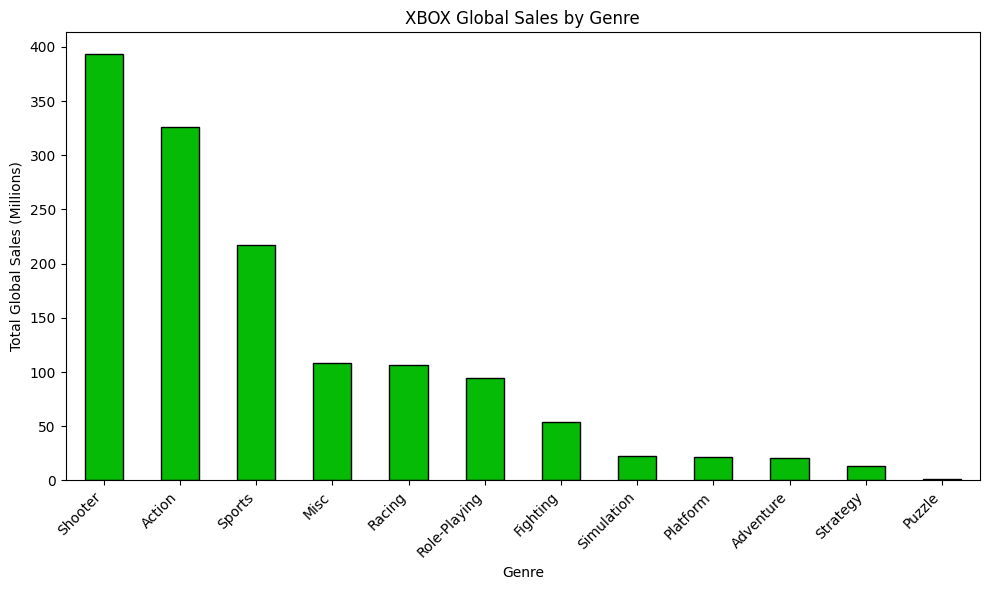

In [33]:
plt.figure(figsize=(10, 6))
xb_genre_sales.plot(kind='bar', color='#06BB06', edgecolor='black')

plt.title('XBOX Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## What Was The Sales Like For NA, JP, EU, and Other Yearly?

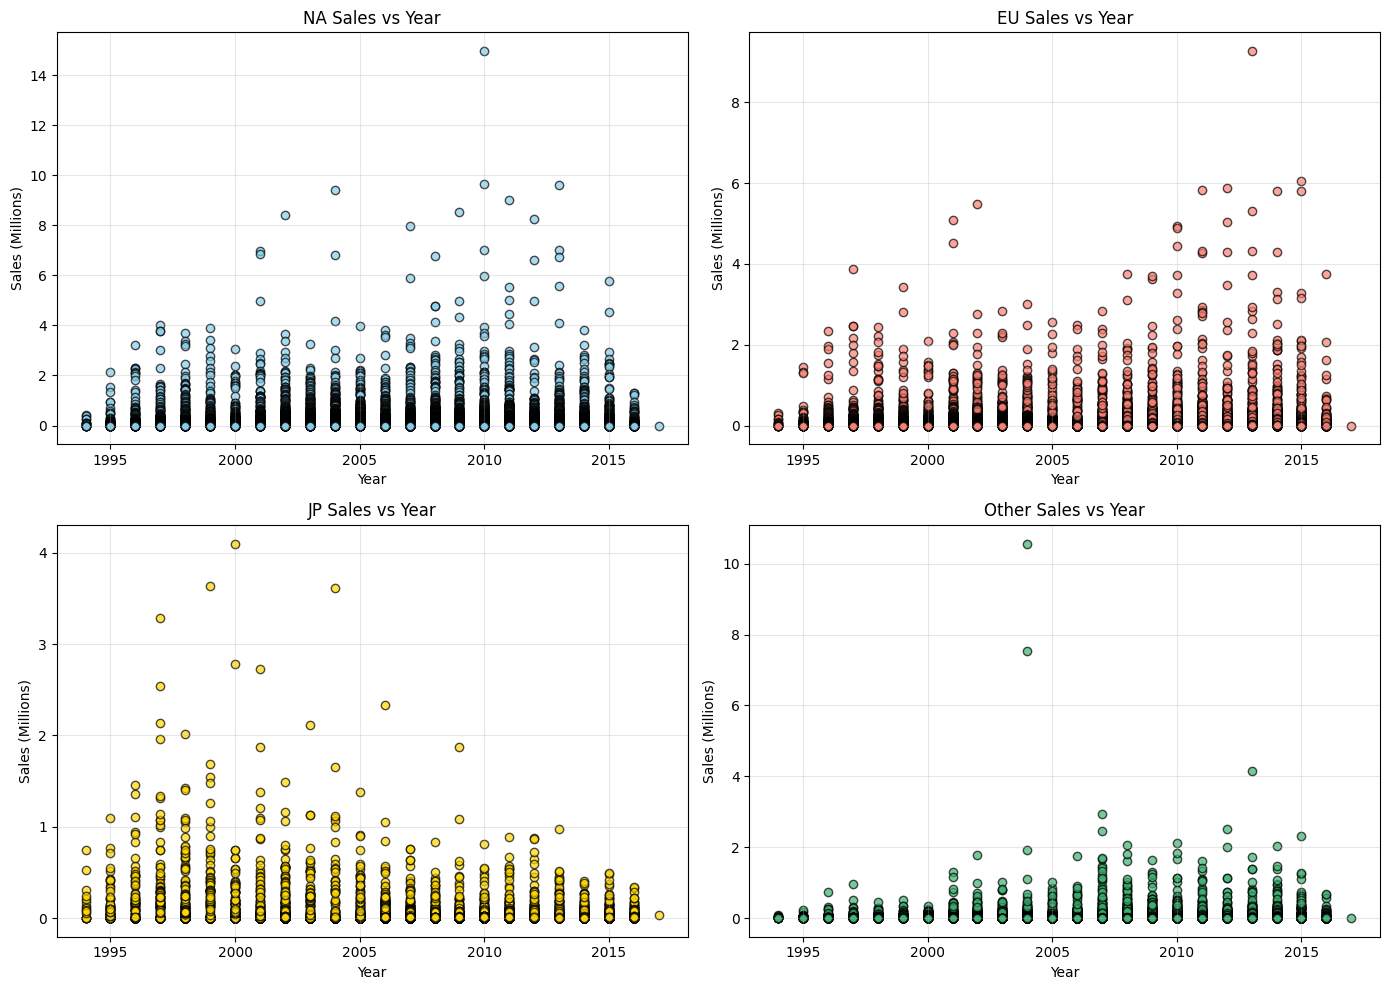

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

regions = {
    "NA_Sales": "skyblue",
    "EU_Sales": "salmon",
    "JP_Sales": "gold",
    "Other_Sales": "mediumseagreen"
}

# Flatten axes for easy looping
axes = axes.ravel()

for ax, (region, color) in zip(axes, regions.items()):
    ax.scatter(df["Year"], df[region], color=color, alpha=0.7, edgecolor="black")
    ax.set_title(f"{region.replace('_', ' ')} vs Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Sales (Millions)")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

